<a href="https://colab.research.google.com/github/Rogrinhu/Big_Data/blob/main/Atividade_Pr%C3%A1tica_Aprendizagem_N%C3%A3o_Supervisionada_028.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Atividade Individual: Crie uma cópia desse notebook, execute o código e responda as questões do [Formulário](https://forms.office.com/r/c2XWKLZ8WC).

In [1]:
# 1. Importe as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

Import da base de dados: Este conjunto de dados foi derivado do censo dos EUA de 1990, com dados sobre moradias na Califórnia

In [2]:
# 2. Carregue a base de dados
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing(as_frame=True)

X = df.data
Y = df.target

#atribuir cabeçalho a base de dados
X = pd.DataFrame(X[['Latitude', 'Longitude']])
Y = pd.DataFrame(Y)
data_california = pd.concat([X, Y], axis=1, ignore_index=True)
data_california.columns = ['Latitude', 'Longitude', 'ValorCasa']

In [3]:
data_california.head()

,Latitude,Longitude,ValorCasa
0,37.88,-122.23,4.526
1,37.86,-122.22,3.585
2,37.85,-122.24,3.521
3,37.85,-122.25,3.413
4,37.85,-122.25,3.422


## 1. Análise Exploratória e Pré-processamento

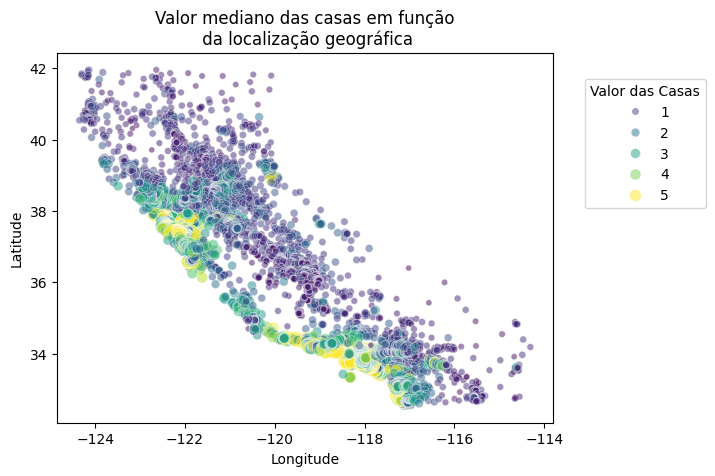

In [4]:
sns.scatterplot(
    data=data_california,
    x="Longitude",
    y="Latitude",
    size="ValorCasa",
    hue="ValorCasa",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="Valor das Casas", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Valor mediano das casas em função\n da localização geográfica")

# 2. Métodos para identificar grupos

Podemos treinar os modelos e verificar os grupos formados pelo KMEANS:

3 GRUPOS:

<Axes: xlabel='Longitude', ylabel='Latitude'>

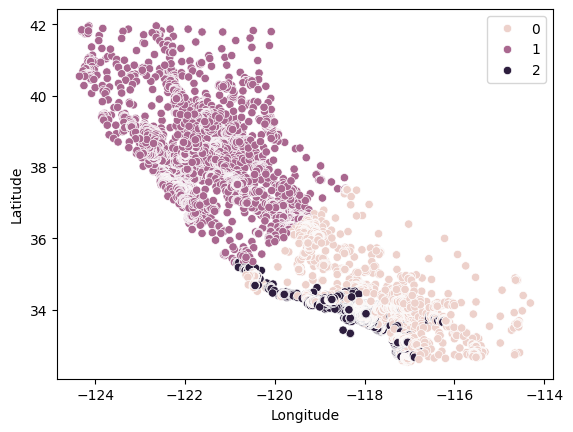

In [6]:
km = KMeans(n_clusters = 3, random_state = 0)
km.fit(data_california)
sns.scatterplot(data = data_california, x = 'Longitude', y = 'Latitude', hue = km.labels_)

4 GRUPOS:

<Axes: xlabel='Longitude', ylabel='Latitude'>

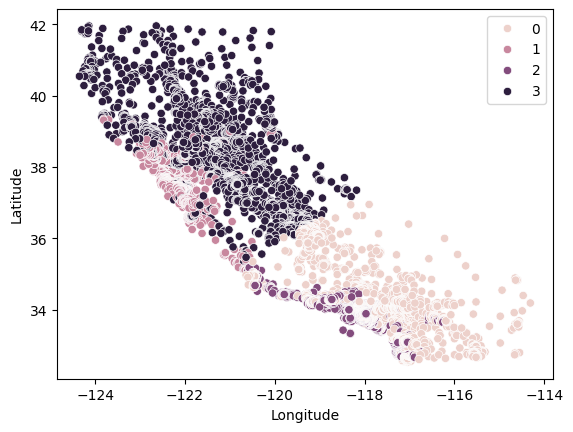

In [7]:
km = KMeans(n_clusters = 4, random_state = 0)
km.fit(data_california)
sns.scatterplot(data = data_california, x = 'Longitude', y = 'Latitude', hue = km.labels_)

# 3. Qual o melhor K?

Método do Cotovelo:

In [8]:
distortions = []
K = range(1,21)
for k in K:
    km = KMeans(n_clusters=k, random_state = 0)
    km.fit(data_california)
    distortions.append(km.inertia_)

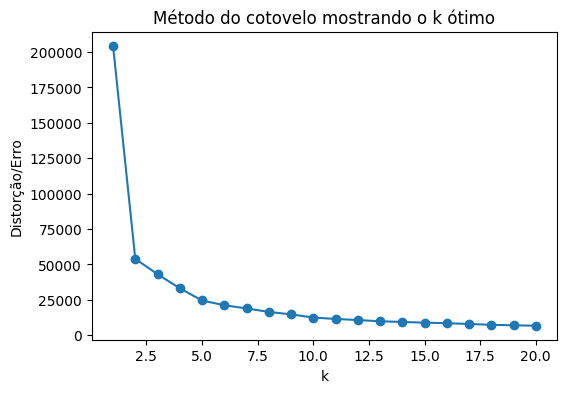

In [9]:
plt.figure(figsize=(6,4))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distorção/Erro')
plt.title('Método do cotovelo mostrando o k ótimo')
plt.show()

Método de Silhouette:

In [10]:
km = KMeans(n_clusters=3,random_state = 0)
km.fit_predict(data_california)

score = silhouette_score(data_california, km.labels_, metric='euclidean')

print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.499


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(10,8))
for i in [2, 3, 4, 5]:
    #gerar kmeans para cada número de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(data_california)


Após suas análises, escolha o melhor K (que gera melhor partição) e substitua no código abaixo e gere os gráficos 1 e 2:

Gráfico 1:

In [ ]:
sns.scatterplot(data = data_california, x = 'Longitude', y = 'Latitude', hue = km.labels_)

Gráfico 2:

In [ ]:
sns.boxplot(x = km.labels_, y = data_california['ValorCasa'])